In [40]:
# Importoar las librerias que me permitiran manipular las bases de datos durante el proyecto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

# Métricas
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    roc_curve,
    precision_recall_curve,
    classification_report,
    confusion_matrix,
    mean_absolute_error,
    r2_score,
    mean_squared_error
)


In [21]:
# Cargamos los datos y asignamos a una variable

df_00 = pd.read_csv('geo_data_0.csv')
df_01 = pd.read_csv('geo_data_1.csv')
df_02 = pd.read_csv('geo_data_2.csv')

In [22]:
# Observamos las dimensiones de nuestros DataSets
print(df_00.info, df_01.info, df_02.info)

<bound method DataFrame.info of           id        f0        f1        f2     product
0      txEyH  0.705745 -0.497823  1.221170  105.280062
1      2acmU  1.334711 -0.340164  4.365080   73.037750
2      409Wp  1.022732  0.151990  1.419926   85.265647
3      iJLyR -0.032172  0.139033  2.978566  168.620776
4      Xdl7t  1.988431  0.155413  4.751769  154.036647
...      ...       ...       ...       ...         ...
99995  DLsed  0.971957  0.370953  6.075346  110.744026
99996  QKivN  1.392429 -0.382606  1.273912  122.346843
99997  3rnvd  1.029585  0.018787 -1.348308   64.375443
99998  7kl59  0.998163 -0.528582  1.583869   74.040764
99999  1CWhH  1.764754 -0.266417  5.722849  149.633246

[100000 rows x 5 columns]> <bound method DataFrame.info of           id         f0         f1        f2     product
0      kBEdx -15.001348  -8.276000 -0.005876    3.179103
1      62mP7  14.272088  -3.475083  0.999183   26.953261
2      vyE1P   6.263187  -5.948386  5.001160  134.766305
3      KcrkZ -13.081

In [23]:
# Observamos los tipo de datos que contiene cada uno
print(df_00.dtypes, df_01.dtypes, df_02.dtypes)

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


In [24]:
# Observamos si cuentan con valores nulos
print(df_00.isnull().sum(), df_01.isnull().sum(), df_02.isnull().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [25]:
# Observamos cuantos vaores o filas tenemos duplicadas
print(df_00.duplicated().sum(), df_01.duplicated().sum(), df_02.duplicated().sum())

0 0 0


### Preparación dataset para modelado
El target que debemos maximizar al parecer es la columna "product", por lo que debemos entrenar nuestro modelo con las demas columnas.
Al ser una columna con los dato de tipo numerico, el modelo corresponde a una regresion. 

In [26]:
# Observamos el comportamiento de las variables y posibles correlaciones.

print(df_00.describe(), df_01.describe(), df_02.describe())

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347                   f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%       

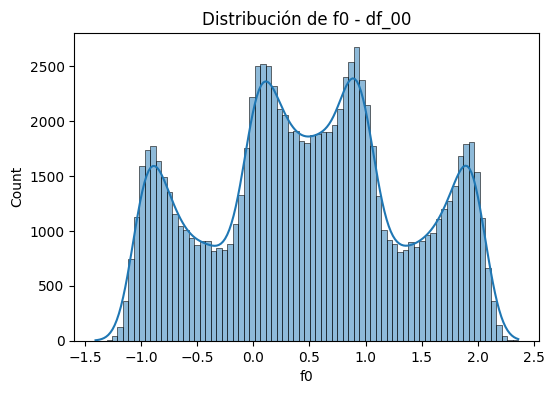

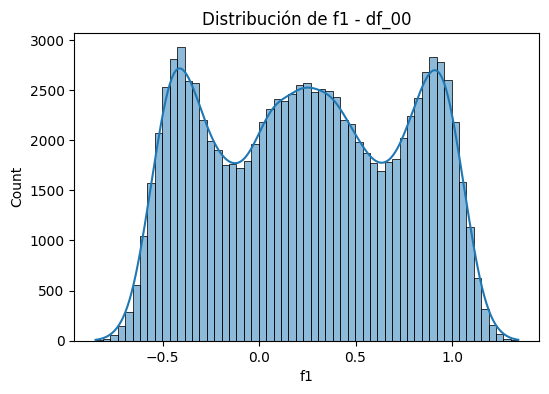

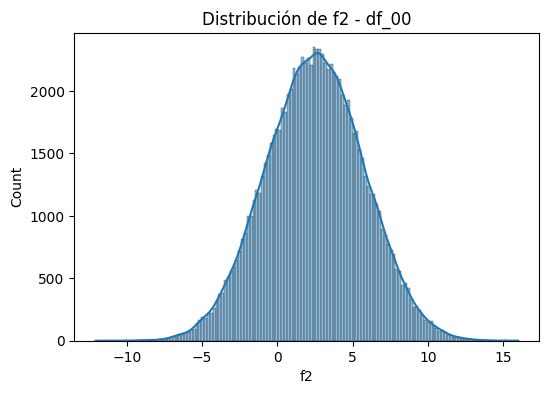

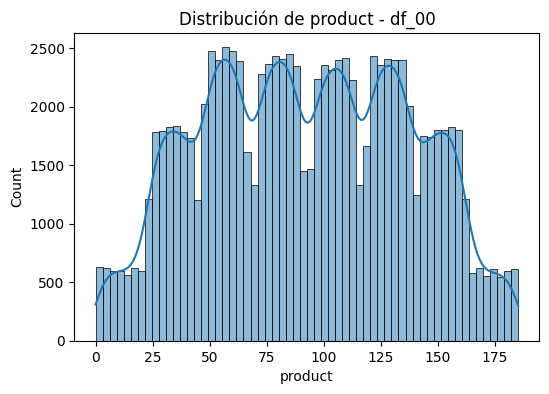

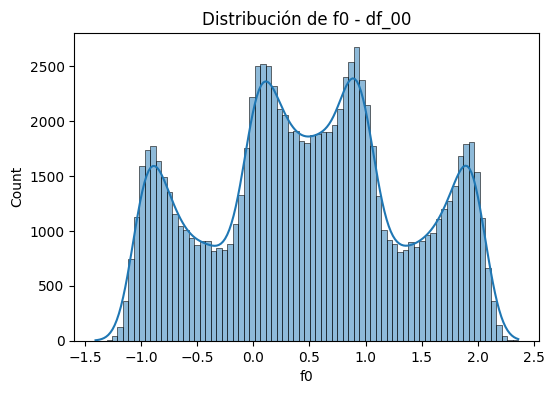

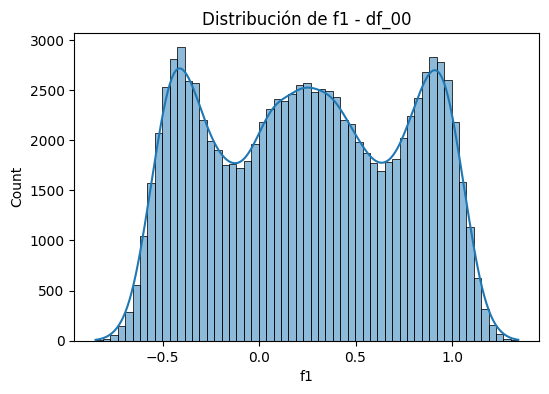

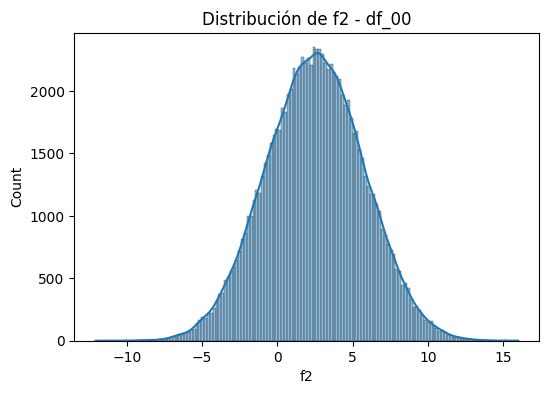

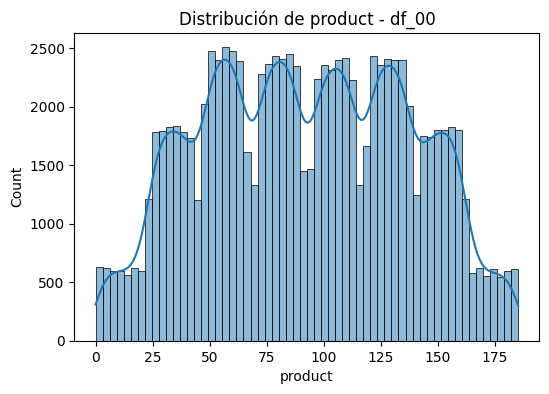

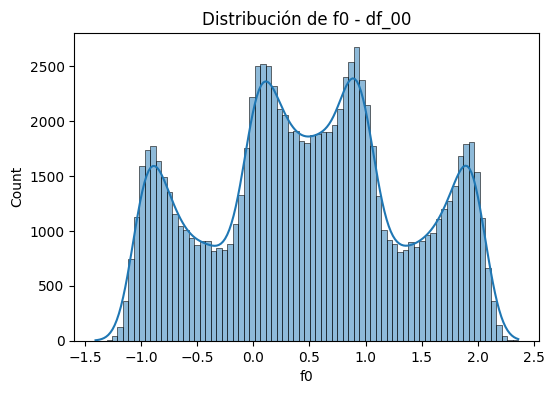

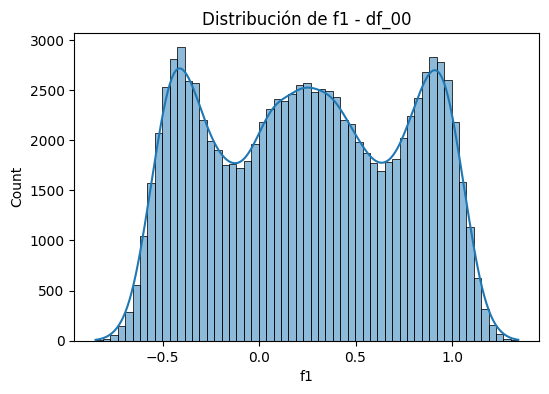

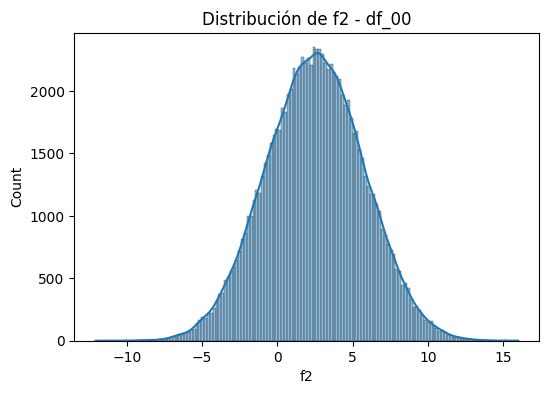

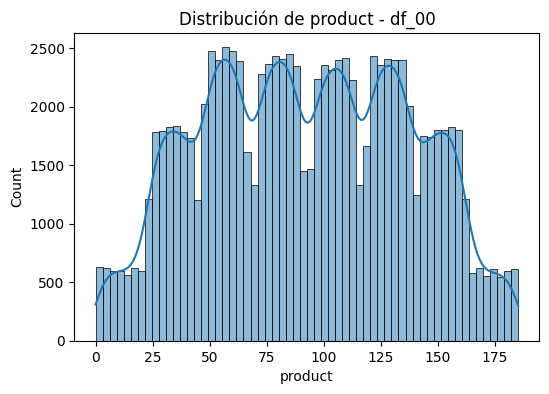

In [27]:
for col in df_00.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_00[col], kde=True)
    plt.title(f'Distribución de {col} - df_00')
    plt.show()

for col in df_01.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_00[col], kde=True)
    plt.title(f'Distribución de {col} - df_00')
    plt.show()

for col in df_02.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_00[col], kde=True)
    plt.title(f'Distribución de {col} - df_00')
    plt.show()


Observamos que las variables f0, f1 y product en nuestros 3 datasets tienen una distribucion distinta y como nos solicitan utilizar el algoritmo de regresion lineal y este es basado en distancias entre datos. Deberiamos Normalizaremos las variables en los datasets, sin embargo, como esto no se nos solicita en el proyecto, continuaremos con la distribucion original.

In [28]:
# Variables numéricas predictoras
variables = ['f0', 'f1', 'f2']

# 1. Aplicar Yeo-Johnson a df_00
pt_00 = PowerTransformer(method='yeo-johnson')
df_00[variables] = pt_00.fit_transform(df_00[variables])

scaler_00 = StandardScaler()
df_00[variables] = scaler_00.fit_transform(df_00[variables])

# 2. Aplicar Yeo-Johnson a df_01
pt_01 = PowerTransformer(method='yeo-johnson')
df_01[variables] = pt_01.fit_transform(df_01[variables])

scaler_01 = StandardScaler()
df_01[variables] = scaler_01.fit_transform(df_01[variables])

# 3. Aplicar Yeo-Johnson a df_02
pt_02 = PowerTransformer(method='yeo-johnson')
df_02[variables] = pt_02.fit_transform(df_02[variables])

scaler_02 = StandardScaler()
df_02[variables] = scaler_02.fit_transform(df_02[variables])


In [29]:
# Dividimos nuestro dataset entre entrenamiento y validación

X = df_00.drop(['product', 'id'], axis=1)
y = df_00['product']

X_train, X_test, y_train, y_test = train_test_split(
    X,               # Variables predictoras
    y,               # Variable objetivo
    test_size=0.25,   # Proporción del 20% para prueba, 80% para entrenamiento
    random_state=42, # Asegura reproducibilidad de la división
    )

print(f'Train: {X_train.shape}, {y_train.shape}')
print(f'Test: {X_test.shape}, {y_test.shape}')

Train: (75000, 3), (75000,)
Test: (25000, 3), (25000,)


In [30]:
# entrenamos el modelo y lo evaluamos

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE  (Mean Squared Error)     : {mse:.4f}')
print(f'RMSE (Root Mean Squared Error): {rmse:.4f}')
print(f'MAE  (Mean Absolute Error)    : {mae:.4f}')
print(f'R2   (Coeficiente de Determinación): {r2:.4f}')

MSE  (Mean Squared Error)     : 1425.6727
RMSE (Root Mean Squared Error): 37.7581
MAE  (Mean Absolute Error)    : 31.0482
R2   (Coeficiente de Determinación): 0.2728


El modelo se equivoca en promedio por 31 a 38 unidades.

Solo acierta en un 27% de lo que realmente pasa.

El resultado no es muy confiable, puede mejorarse.

#### Convertir en funcion los anteriores paso para utilizarlas en los 2 datasets restantes:

In [31]:
def entrenar_y_guardar_resultados(df, nombre='Dataset', scaler=None):
    # Separar variables
    X = df.drop(['product', 'id'], axis=1)
    y = df['product']

    # Dividir en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42
    )

    # Entrenar el modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    # Predecir
    y_pred = modelo.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Mostrar resultados
    print(f'\nResultados para {nombre}:')
    print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}')

    # Devolver el diccionario con resultados
    return {
        'modelo': modelo,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'y_pred': y_pred,
        'scaler': scaler,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }




In [32]:
# Implementamos las funciones a todos los datasets
resultados_df_00 = entrenar_y_guardar_resultados(df_00, nombre='df_00')
resultados_df_01 = entrenar_y_guardar_resultados(df_01, nombre='df_01')
resultados_df_02 = entrenar_y_guardar_resultados(df_02, nombre='df_02')


Resultados para df_00:
MSE: 1425.67, RMSE: 37.76, MAE: 31.05, R2: 0.27

Resultados para df_01:
MSE: 12.07, RMSE: 3.47, MAE: 3.08, R2: 0.99

Resultados para df_02:
MSE: 1611.75, RMSE: 40.15, MAE: 32.90, R2: 0.20


In [33]:
def evaluar_rentabilidad(resultados, nombre='Región', top_n=200):
    """
    Evalúa la rentabilidad de una región tomando las top N predicciones más altas
    y calcula la ganancia total esperada.

    Args:
    - resultados: Diccionario con 'y_pred' ya desescalado o en unidades reales.
    - nombre: Nombre de la región.
    - top_n: Número de mejores pozos a considerar (default 200).

    Returns:
    - Diccionario con resumen de la evaluación.
    """
    # Ordenar y tomar las mejores predicciones
    mejores_pozos = np.sort(resultados['y_pred'])[-top_n:]

    # Calcular ganancias por pozo: (producción * 1000 dólares) - costo fijo
    ganancias_por_pozo = (mejores_pozos * 1000) - 500_000

    # Sumar ganancias totales
    ganancia_total = np.sum(ganancias_por_pozo)

    print(f"\n💰 {nombre} - Ganancia esperada con {top_n} mejores pozos: ${ganancia_total:,.2f}")

    return {
        'region': nombre,
        'ganancia_total': ganancia_total,
        'mejores_pozos': mejores_pozos
    }


In [34]:
# Evaluar cada región con sus resultados desescalados
evaluacion_00 = evaluar_rentabilidad(resultados_df_00, 'Región 00')
evaluacion_01 = evaluar_rentabilidad(resultados_df_01, 'Región 01')
evaluacion_02 = evaluar_rentabilidad(resultados_df_02, 'Región 02')


💰 Región 00 - Ganancia esperada con 200 mejores pozos: $-69,137,018.55

💰 Región 01 - Ganancia esperada con 200 mejores pozos: $-73,096,232.30

💰 Región 02 - Ganancia esperada con 200 mejores pozos: $-70,309,600.37


In [35]:
# Consolidar evaluaciones
evaluaciones = [evaluacion_00, evaluacion_01, evaluacion_02]

# Ordenar por mayor ganancia
mejor = max(evaluaciones, key=lambda x: x['ganancia_total'])

# Mostrar recomendación final
print(f"\n✅ Recomendación: Invertir en {mejor['region']} con una ganancia esperada de ${mejor['ganancia_total']:,.2f}")


✅ Recomendación: Invertir en Región 00 con una ganancia esperada de $-69,137,018.55


In [36]:
def simulacion_bootstrap(y_pred_all, nombre='Región', n_iteraciones=1000):
    """
    Realiza simulaciones de bootstrapping sobre todas las predicciones
    para calcular el beneficio promedio, intervalo de confianza y riesgo.
    """
    np.random.seed(41)
    ganancias_simuladas = []

    for _ in range(n_iteraciones):
        # Toma una muestra aleatoria con reemplazo de TODAS las predicciones
        muestra = np.random.choice(y_pred_all, size=500, replace=True)  # Por ejemplo, tomar 500 aleatoriamente

        # De esa muestra, selecciona los 200 mejores
        mejores_200 = np.sort(muestra)[-200:]

        # Calcula la ganancia de esos 200
        ganancias = (mejores_200 * 1000) - 500000
        ganancia_total = np.sum(ganancias)
        ganancias_simuladas.append(ganancia_total)

    ganancias_simuladas = np.array(ganancias_simuladas)
    promedio = np.mean(ganancias_simuladas)
    intervalo_95 = np.percentile(ganancias_simuladas, [2.5, 97.5])
    riesgo_perdida = np.mean(ganancias_simuladas < 0) * 100

    print(f"\n📊 {nombre} - Simulación Bootstrapping")
    print(f"Promedio de ganancia       : ${promedio:,.2f}")
    print(f"95% Intervalo de confianza : ${intervalo_95[0]:,.2f} a ${intervalo_95[1]:,.2f}")
    print(f"Riesgo de pérdida          : {riesgo_perdida:.2f}%")

    return {
        'region': nombre,
        'promedio': promedio,
        'intervalo': intervalo_95,
        'riesgo': riesgo_perdida
    }


In [37]:
# Aplicar a las evaluaciones previas
simulacion_00 = simulacion_bootstrap(resultados_df_00['y_pred'], 'Región 00')
simulacion_01 = simulacion_bootstrap(resultados_df_01['y_pred'], 'Región 01')
simulacion_02 = simulacion_bootstrap(resultados_df_02['y_pred'], 'Región 02')



📊 Región 00 - Simulación Bootstrapping
Promedio de ganancia       : $-77,038,441.96
95% Intervalo de confianza : $-77,552,848.60 a $-76,522,830.32
Riesgo de pérdida          : 100.00%

📊 Región 01 - Simulación Bootstrapping
Promedio de ganancia       : $-77,037,346.48
95% Intervalo de confianza : $-77,853,153.26 a $-76,236,420.90
Riesgo de pérdida          : 100.00%

📊 Región 02 - Simulación Bootstrapping
Promedio de ganancia       : $-77,187,678.42
95% Intervalo de confianza : $-77,620,686.16 a $-76,743,933.49
Riesgo de pérdida          : 100.00%


In [38]:
# Consolidar simulaciones
simulaciones = [simulacion_00, simulacion_01, simulacion_02]

# Ordenar por mayor ganancia promedio
mejor = max(simulaciones, key=lambda x: x['promedio'])

# Mostrar recomendación final
print(f"\n✅ Recomendación Final: Invertir en {mejor['region']} con una ganancia promedio de ${mejor['promedio']:,.2f} y un riesgo de pérdida del {mejor['riesgo']:.2f}%")



✅ Recomendación Final: Invertir en Región 01 con una ganancia promedio de $-77,037,346.48 y un riesgo de pérdida del 100.00%
